In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [26]:
df = pd.read_csv('simulation.csv')
headers = list(df.columns)[3:]
df

,security,min_peers,nodes,nodes_infected,nodes_safe,epochs,epochs_infect,epochs_protect,edges,density,avg_path_len
0,20,2,1000,18,982,92,91,91,1450,0.002903,54.807367
1,20,2,1000,30,970,77,76,76,1435,0.002873,47.668551
2,40,2,1000,1,999,74,73,73,1441,0.002885,41.641964
3,30,2,1000,13,987,68,67,67,1429,0.002861,40.451734
4,20,2,1000,57,943,105,104,104,1433,0.002869,60.992444
...,...,...,...,...,...,...,...,...,...,...,...
48995,80,7,1000,14,986,18,17,17,5654,0.011319,7.896847
48996,80,8,1000,7,993,15,14,14,6584,0.013181,7.000781
48997,80,8,1000,9,991,15,14,14,6564,0.013141,7.068450
48998,80,8,1000,16,984,15,14,14,6567,0.013147,6.977187


In [27]:
data_avg = defaultdict(list)
securities = df['security'].unique()
min_peers = df['min_peers'].unique()
for security in securities:
  for min_peer in min_peers:
    data_avg['security'].append(security)
    data_avg['min_peers'].append(min_peer)
    _df = df.loc[(df['security'] == security) & (df['min_peers'] == min_peer)]
    for col in _df.columns:
      if col in ['security', 'min_peers', 'nodes']:
        continue
      data_avg[col].append( _df[col].mean() )
df_avg = pd.DataFrame(data_avg)
df_avg.sort_values(by=['security','min_peers'], ascending=[False,True], inplace=True)
df_avg

,security,min_peers,nodes_infected,nodes_safe,epochs,epochs_infect,epochs_protect,edges,density,avg_path_len
42,80,2,1.722,998.278,104.784,103.784,103.784,1438.177,0.002879,51.560864
43,80,3,2.667,997.333,36.067,35.067,35.067,2210.753,0.004426,18.497737
44,80,4,3.885,996.115,26.377,25.377,25.377,3038.997,0.006084,13.334797
45,80,5,5.452,994.548,21.232,20.232,20.232,3894.600,0.007797,10.747133
46,80,6,7.566,992.434,17.947,16.947,16.947,4770.087,0.009550,9.090586
47,80,7,9.549,990.451,15.606,14.606,14.606,5660.701,0.011332,7.908291
48,80,8,13.070,986.930,13.972,12.972,12.972,6561.811,0.013137,7.022169
21,70,2,2.561,997.439,104.062,103.062,103.062,1437.968,0.002879,51.259483
22,70,3,4.334,995.666,36.218,35.218,35.218,2210.038,0.004424,18.512081
23,70,4,6.802,993.198,26.326,25.326,25.326,3038.613,0.006083,13.344238


In [28]:

df_avg_tex = df_avg.copy()
df_avg_tex.drop('epochs_infect', inplace=True, axis=1)
df_avg_tex.drop('epochs_protect', inplace=True, axis=1)
df_avg_tex.rename(columns={'security': 's', 'min_peers': 'p', 'nodes_infected': 'zainfekowane', 'nodes_safe': 'bezpieczne', 'epochs': 'epoki', 'edges': 'krawędzie', 'density': 'gęstosć', 'avg_path_len': 'śr.dł.śc.'}, inplace=True)
df_avg_latex = df_avg_tex.to_latex(
  index=False,
  caption='Zmierzone wartości.',
  label='tab:dataframe'
)

with open('data.tex', 'w') as f:
  f.write(df_avg_latex)

C:\Users\mikol\AppData\Local\Temp\ipykernel_19680\1276560887.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_avg_latex = df_avg_tex.to_latex(


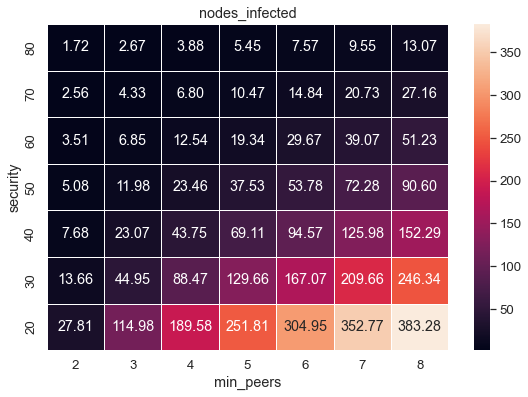

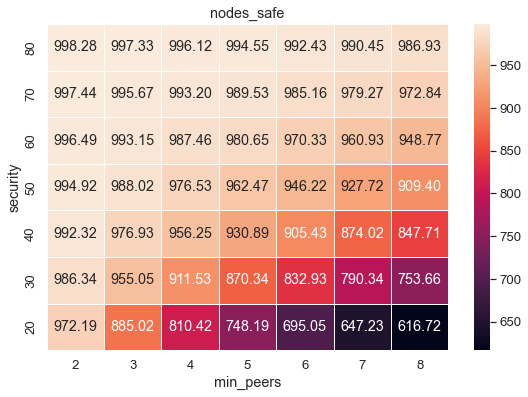

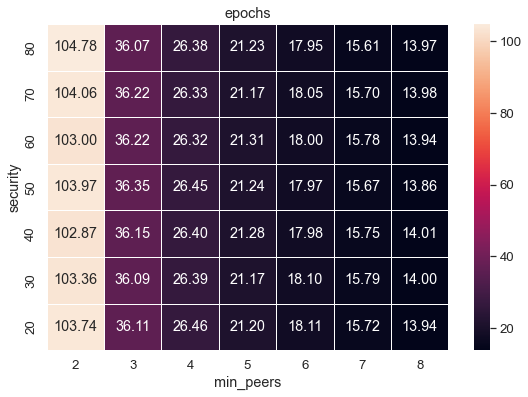

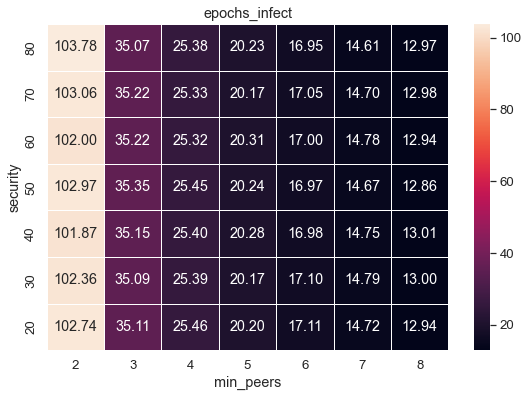

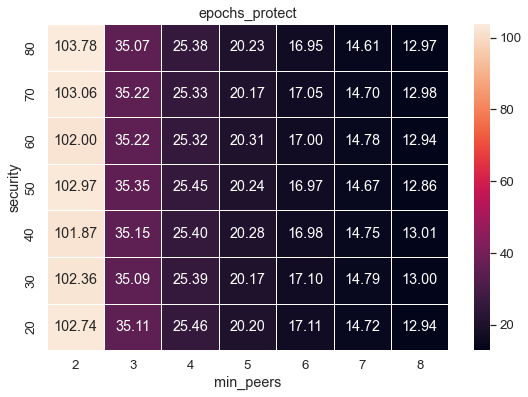

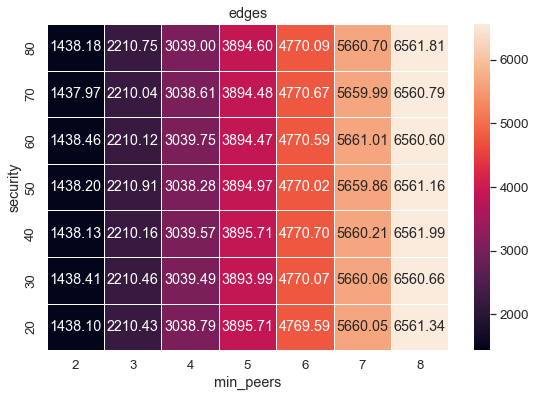

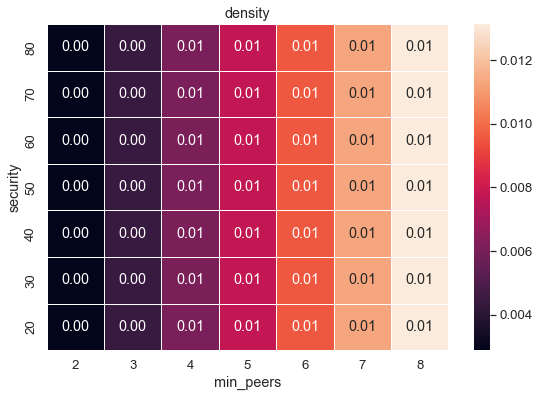

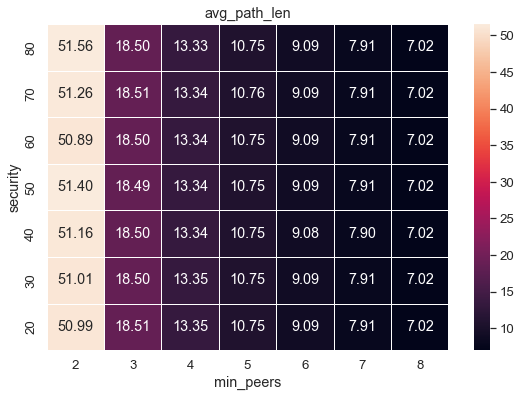

In [29]:
sns.set_theme()
sns.set(font_scale=1.2)

for header in headers:
  data = df_avg.pivot('security', 'min_peers', header)
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.set_title(header)
  plot = sns.heatmap(data, annot=True, fmt='.2f', linewidths=.5, ax=ax)
  ax.invert_yaxis()
  plot.figure.savefig(f'plots/{header}.jpg')